In [12]:
import scipy
import numpy as np
from scipy.optimize import minimize, differential_evolution
from scipy.optimize import LinearConstraint, NonlinearConstraint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
from itertools import combinations

n = 4
symbols = sp.symbols('a_:'+str(n**2))
matrix = sp.Matrix(n,n, symbols)

m=0
for j in range(n):    
    for k in range(j,n):
        m+=1
        matrix[j,k] = 'a_'+str(m)
        matrix[k,j] = 'a_'+str(m)

print(matrix)


def sum_matrix_minors(matrix, k):
    return sum(matrix[i, i].det() for i in combinations(range(n), k))

def run_function_with_const(loc, constraints = None):
    bounds = [(0.0, 1.0)] * 10
    num_starts = 10
    results = [minimize(funcs_of_principal_minors[loc], np.random.rand(10), bounds=bounds, constraints=constraints, tol=1e-7) for _ in range(num_starts)]
    return min(results, key=lambda x: x.fun)

def optimize_func(loc, eqs = []):
    if len(eqs) == 0:
        return run_function_with_const(loc)
    equals = []
    for i in range(0, len(eqs)):
        equals.append(NonlinearConstraint(
        lambda x: funcs_of_principal_minors[eqs[i][0]](x) - eqs[i][1],
        [0.0],
        [0.0]
    ))
    return run_function_with_const(loc, equals)

funcs_of_principal_minors = tuple(
    sp.lambdify([symbols[1:11]], sum_matrix_minors(matrix, k), 'numpy')
    for k in range(1, n+1)
) + tuple(
    sp.lambdify([symbols[1:11]], -1*sum_matrix_minors(matrix, k), 'numpy')
    for k in range(1, n+1)
)

Matrix([[a_1, a_2, a_3, a_4], [a_2, a_5, a_6, a_7], [a_3, a_6, a_8, a_9], [a_4, a_7, a_9, a_10]])


In [10]:
result_min = optimize_func(0)
result_max = optimize_func(0+n)

np.set_printoptions(precision=3)

print("Minimum value found:", result_min.fun)
print("Achieved at:", result_min.x)
print("Maximum value found:", -1*result_max.fun)
print("Achieved at:", result_max.x)

print(result_max)

Minimum value found: 0.0
Achieved at: [0.    0.883 0.951 0.912 0.    0.42  0.796 0.    0.711 0.   ]
Maximum value found: 4.0
Achieved at: [1.    0.181 0.555 0.092 1.    0.557 0.022 1.    0.948 1.   ]
      fun: -4.0
 hess_inv: <10x10 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.,  0.,  0.,  0., -1.,  0.,  0., -1.,  0., -1.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 22
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([1.   , 0.181, 0.555, 0.092, 1.   , 0.557, 0.022, 1.   , 0.948,
       1.   ])


In [15]:
result_min = optimize_func(1, [[0, 2]])
result_max = optimize_func(1+n, [[0+n, -2]])

np.set_printoptions(precision=3)

print("Minimum value found:", result_min.fun)
print("Achieved at:", result_min.x)
print(result_min)
print()
print("Maximum value found:", -1*result_max.fun)
print("Achieved at:", result_max.x)

print(result_max)

Minimum value found: -5.0
Achieved at: [0. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
     fun: -5.0
     jac: array([ 2., -2., -2., -2.,  1., -2., -2.,  2., -2.,  1.])
 message: 'Optimization terminated successfully'
    nfev: 44
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0., 1., 1., 1., 1., 1., 1., 0., 1., 1.])

Maximum value found: 1.5
Achieved at: [5.000e-01 5.551e-17 0.000e+00 6.661e-16 5.000e-01 9.992e-16 0.000e+00
 5.000e-01 4.441e-16 5.000e-01]
     fun: -1.5
     jac: array([-1.50e+00,  1.49e-08,  1.49e-08,  1.49e-08, -1.50e+00,  1.49e-08,
        1.49e-08, -1.50e+00,  1.49e-08, -1.50e+00])
 message: 'Optimization terminated successfully'
    nfev: 22
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([5.000e-01, 5.551e-17, 0.000e+00, 6.661e-16, 5.000e-01, 9.992e-16,
       0.000e+00, 5.000e-01, 4.441e-16, 5.000e-01])


In [88]:
result_min = optimize_func(2, [[0,1],[1,-3/4]])
result_max = optimize_func(2+n, [[0+n,1],[1+n,-3/4]])

np.set_printoptions(precision=3)

print("Minimum value found:", result_min.fun)
print("Achieved at:", result_min.x)
print("Maximum value found:", -1*result_max.fun)
print("Achieved at:", result_max.x)

({'type': 'eq', 'fun': <function optimize_func.<locals>.<lambda> at 0x712c07e25ea0>}, {'type': 'eq', 'fun': <function optimize_func.<locals>.<lambda> at 0x712c083630a0>})
({'type': 'eq', 'fun': <function optimize_func.<locals>.<lambda> at 0x712c07e25090>}, {'type': 'eq', 'fun': <function optimize_func.<locals>.<lambda> at 0x712c0e9a8820>})
Minimum value found: -0.35282491557186724
Achieved at: [0.699 0.027 0.074 0.074 0.027 0.699]
Maximum value found: 1.3932673133672067
Achieved at: [0.449 0.449 0.449 0.449 0.449 0.449]


In [82]:
result_min = optimize_func(3, [[0,0], [1, -1], [2, 0]])
result_min = optimize_func(3+n, [[0+n,0], [1+n, -1], [2+n, 0]])

np.set_printoptions(precision=3)

print("Minimum value found:", result_min.fun)
print("Achieved at:", result_min.x)
print("Maximum value found:", -1*result_max.fun)
print("Achieved at:", result_max.x)

[[0, 0], [1, -1], [2, 0]]
[[4, 0], [5, -1], [6, 0]]
Minimum value found: -4.857395742489296
Achieved at: [0.888 0.887 0.715 0.51  1.    0.   ]
Maximum value found: 3.9750613169057467
Achieved at: [0.582 0.582 0.582 0.728 0.728 0.97 ]


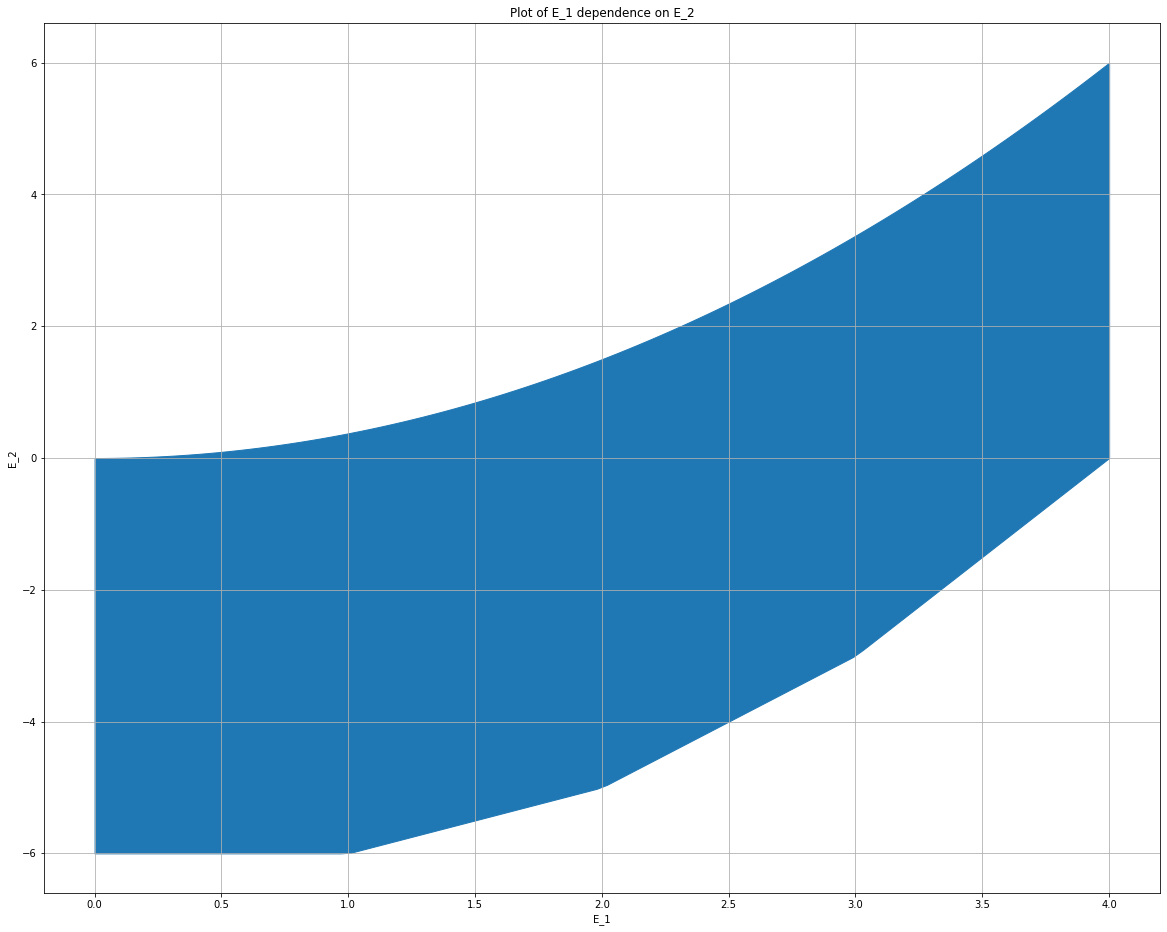

In [13]:
x_values = np.linspace(0, 4, 100)

# Calculate corresponding y values
min_y_values = [optimize_func(1, [[0,x]]).fun for x in x_values]
max_y_values = [-1*optimize_func(1+n, [[0+n,-x]]).fun for x in x_values]

# Plot the function
plt.figure(figsize=(20, 16))
plt.fill_between(x_values, min_y_values, max_y_values, interpolate=True, label='E_1 dependence on E_2', color='C0')

plt.title('Plot of E_1 dependence on E_2')
plt.xlabel('E_1')
plt.ylabel('E_2')
plt.grid(True)
plt.savefig('test.png', bbox_inches='tight')

           6             5           4           3          2
2.015e-10 x - 2.979e-09 x + 1.8e-08 x + 0.03704 x + 0.2222 x - 0.5556 x + 0.2963
R-Value: 1.0


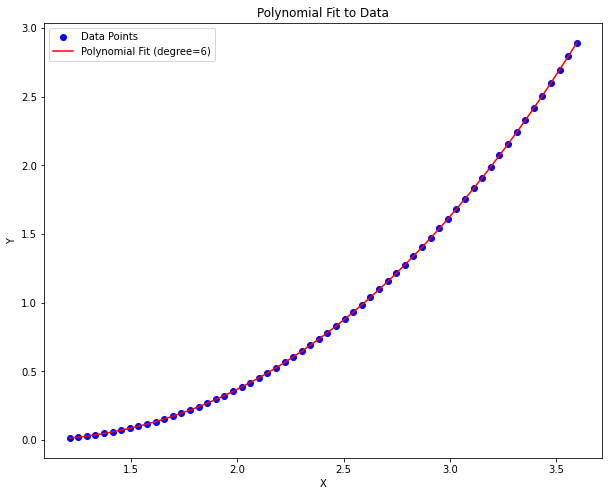

In [37]:
x = x_values[30:90]
y = max_y_values[30:90]


# Fit a polynomial of degree n (change n as needed)
degree = 6
coefficients = np.polyfit(x, y, degree)

# Generate a polynomial function from the coefficients
poly_func = np.poly1d(coefficients)
print(poly_func)

# Calculate R-squared
y_pred = poly_func(x)
residuals = y - y_pred
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)

print("R-Value:", r_squared)

# Generate values for plotting the fitted polynomial
x_fit = np.linspace(min(x), max(x), 100)
y_fit = poly_func(x_fit)

# Plotting the data points and the fitted polynomial
plt.close()
plt.figure(figsize=(10, 8))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_fit, y_fit, color='red', label=f'Polynomial Fit (degree={degree})')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Fit to Data')
plt.legend()
plt.show()